In [0]:
# here is the all imports required 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Data
# pre-uploaded data to the folder
# employment_income.csv
# employment_income_MetaData.csv

In [0]:
# Read CSV
emp_income = pd.read_csv(r'employment_income.csv')

In [0]:
# Rename column, replace space with "_"
emp_income = emp_income.rename({'Educational qualification':'Educational_qualification'},axis=1)
emp_income = emp_income.rename({'Field of study':'Field_of_study','Age group':'Age_group'},axis=1)
emp_income = emp_income.rename({'Status of student in Canada':'Status_of_student_in_Canada'},axis=1)
emp_income = emp_income.rename({'Characteristics after graduation':'Characteristics_after_graduation'},axis=1)
emp_income = emp_income.rename({'Graduate statistics':'Graduate_statistics'},axis=1)

In [0]:
emp_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189307 entries, 0 to 2189306
Data columns (total 21 columns):
REF_DATE                            int64
GEO                                 object
DGUID                               object
Educational_qualification           object
Field_of_study                      object
Gender                              object
Age_group                           object
Status_of_student_in_Canada         object
Characteristics_after_graduation    object
Graduate_statistics                 object
UOM                                 object
UOM_ID                              int64
SCALAR_FACTOR                       object
SCALAR_ID                           int64
VECTOR                              object
COORDINATE                          object
VALUE                               float64
STATUS                              object
SYMBOL                              float64
TERMINATED                          float64
DECIMALS                   

**Data Clean**

In [0]:
# convert objecy type to category type
emp_income = emp_income.astype('category')
emp_income['VALUE'] = emp_income['VALUE'].astype('float64')

In [0]:
# drop rows
# remove rows, which value of the column STATUS is equal to '..',(not available for a specific reference period) 
# remove rows, which value of the column STATUS is equal to x', (suppressed to meet the confidentiality requirements of the Statistics Act)
# 29834 rows removed
emp_income.drop(emp_income[emp_income.STATUS=='..'].index, inplace=True)
emp_income.drop(emp_income[emp_income.STATUS=='x'].index, inplace=True)
# only "Canadian students"
emp_income.drop(emp_income[emp_income.Status_of_student_in_Canada =='Canadian and international students'].index, inplace=True)
# remove "Total, educational qualification"
emp_income.drop(emp_income[emp_income.Educational_qualification == 'Total, educational qualification'].index, inplace=True)

In [0]:
# drop colums 
emp_income.drop(['UOM','DGUID','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'],axis=1,inplace=True)
emp_income.drop(['Status_of_student_in_Canada'],axis=1,inplace=True)
emp_income.head()

,REF_DATE,GEO,Educational_qualification,Field_of_study,Gender,Age_group,Characteristics_after_graduation,Graduate_statistics,VALUE
5266,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,All graduates,Number of graduates,13030.0
5267,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates with no income information,Number of graduates,1705.0
5268,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Full-time students,Number of graduates,630.0
5269,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Number of graduates,10685.0
5270,2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Median employment income,35200.0


In [0]:
emp_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760522 entries, 5266 to 2189305
Data columns (total 9 columns):
REF_DATE                            760522 non-null category
GEO                                 760522 non-null category
Educational_qualification           760522 non-null category
Field_of_study                      760522 non-null category
Gender                              760522 non-null category
Age_group                           760522 non-null category
Characteristics_after_graduation    760522 non-null category
Graduate_statistics                 760522 non-null category
VALUE                               760522 non-null float64
dtypes: category(8), float64(1)
memory usage: 17.4 MB


### output CSV file by year
### create data frame by year

In [0]:
print(emp_income['REF_DATE'].unique())

[2010, 2011, 2012, 2013, 2014, 2015]
Categories (6, int64): [2010, 2011, 2012, 2013, 2014, 2015]


In [0]:
# output CSV file by year
# emp_income['REF_DATE'].unique() outputs [2010, 2011, 2012, 2013, 2014, 2015]
#
for year in emp_income['REF_DATE'].unique():
    print('employment_income_'+str(year)+'.csv')
    emp_income[emp_income.REF_DATE == year].to_csv('employment_income_'+ str(year) + '.csv',index=False)


employment_income_2010.csv
employment_income_2011.csv
employment_income_2012.csv
employment_income_2013.csv
employment_income_2014.csv
employment_income_2015.csv


In [0]:
emp_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760522 entries, 5266 to 2189305
Data columns (total 9 columns):
REF_DATE                            760522 non-null category
GEO                                 760522 non-null category
Educational_qualification           760522 non-null category
Field_of_study                      760522 non-null category
Gender                              760522 non-null category
Age_group                           760522 non-null category
Characteristics_after_graduation    760522 non-null category
Graduate_statistics                 760522 non-null category
VALUE                               760522 non-null float64
dtypes: category(8), float64(1)
memory usage: 17.4 MB


### work with emp_income

In [0]:
emp_income['REF_DATE'] = emp_income['REF_DATE'].apply(lambda x: 'year'+str(x))

In [0]:
emp_income

,REF_DATE,GEO,Educational_qualification,Field_of_study,Gender,Age_group,Characteristics_after_graduation,Graduate_statistics,VALUE
5266,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,All graduates,Number of graduates,13030.0
5267,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates with no income information,Number of graduates,1705.0
5268,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Full-time students,Number of graduates,630.0
5269,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Number of graduates,10685.0
5270,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Median employment income,35200.0
...,...,...,...,...,...,...,...,...,...
2189293,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,Graduates reporting employment income,Number of graduates,0.0
2189295,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0
2189302,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,35 to 64 years,All graduates,Number of graduates,5.0
2189303,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,35 to 64 years,Graduates reporting employment income,Number of graduates,0.0


In [0]:
#emp_income.reset_index(inplace=True)
# only the rows with column Characteristics_after_graduation has value of 'Graduates reporting employment income' or'Graduates reporting wages, salaries and commissions only' reported income
vGraduate_statistics = ['Graduates reporting employment income','Graduates reporting wages, salaries and commissions only']
emp_income_reportedIncome = emp_income.loc[emp_income['Characteristics_after_graduation'].isin(vGraduate_statistics)]
emp_income_reportedIncome

,REF_DATE,GEO,Educational_qualification,Field_of_study,Gender,Age_group,Characteristics_after_graduation,Graduate_statistics,VALUE
5269,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Number of graduates,10685.0
5270,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,Graduates reporting employment income,Median employment income,35200.0
5271,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,8600.0
5272,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 64 years,"Graduates reporting wages, salaries and commis...",Median employment income,36800.0
5283,year2010,Canada,"Career, technical or professional training sho...","Total, field of study","Total, gender",15 to 34 years,Graduates reporting employment income,Number of graduates,5030.0
...,...,...,...,...,...,...,...,...,...
2189285,year2015,Territories,Master's degree,Public administration and social service profe...,"Total, gender",35 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0
2189293,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,Graduates reporting employment income,Number of graduates,0.0
2189295,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,15 to 64 years,"Graduates reporting wages, salaries and commis...",Number of graduates,0.0
2189303,year2015,Territories,Master's degree,Public administration and social service profe...,Female gender,35 to 64 years,Graduates reporting employment income,Number of graduates,0.0


In [0]:
emp_income_reportedIncome['Graduate_statistics'].unique()

[Number of graduates, Median employment income]
Categories (2, object): [Number of graduates, Median employment income]

In [0]:
emp_income_reportedIncome['Characteristics_after_graduation'].unique()

[Graduates reporting employment income, Graduates reporting wages, salaries and commis...]
Categories (2, object): [Graduates reporting employment income, Graduates reporting wages, salaries and commis...]

In [0]:
#select Field of Study
#1. Mathematics, computer and information sciences [7]
#2. Computer and information sciences and support services [11]
#3. Mathematics and statistics [27]

vFoS = ['Mathematics and statistics [27]','Computer and information sciences and support services [11]','Mathematics, computer and information sciences [7]']
emp_income_reportedIncome = emp_income.loc[emp_income['Field_of_study'].isin(vFoS)]
emp_income_reportedIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39414 entries, 7672 to 2186793
Data columns (total 9 columns):
REF_DATE                            39414 non-null category
GEO                                 39414 non-null category
Educational_qualification           39414 non-null category
Field_of_study                      39414 non-null category
Gender                              39414 non-null category
Age_group                           39414 non-null category
Characteristics_after_graduation    39414 non-null category
Graduate_statistics                 39414 non-null category
VALUE                               39414 non-null float64
dtypes: category(8), float64(1)
memory usage: 929.3 KB


In [0]:
emp_income_median = emp_income_reportedIncome[emp_income_reportedIncome.Graduate_statistics == 'Median employment income']
emp_income_median.head()
emp_income_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6259 entries, 7676 to 2181309
Data columns (total 9 columns):
REF_DATE                            6259 non-null category
GEO                                 6259 non-null category
Educational_qualification           6259 non-null category
Field_of_study                      6259 non-null category
Gender                              6259 non-null category
Age_group                           6259 non-null category
Characteristics_after_graduation    6259 non-null category
Graduate_statistics                 6259 non-null category
VALUE                               6259 non-null float64
dtypes: category(8), float64(1)
memory usage: 152.3 KB


In [0]:
emp_income_median['new_FieldOfStudy'] = emp_income_median[[ 'Field_of_study','Educational_qualification']].astype(str).apply('-'.join, axis=1)

C:\Users\wiwang\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
emp_income_median.drop(['Educational_qualification','Field_of_study','Characteristics_after_graduation','Graduate_statistics'],axis=1,inplace=True)

C:\Users\wiwang\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Does gender or age affect the median income in the same field of study?


In [0]:
# convert objecy type to category type
emp_income_median = emp_income_median.astype('object')
emp_income_median['VALUE'] = emp_income_median['VALUE'].astype('float64')
emp_income_median.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6259 entries, 7676 to 2181309
Data columns (total 6 columns):
REF_DATE            6259 non-null object
GEO                 6259 non-null object
Gender              6259 non-null object
Age_group           6259 non-null object
VALUE               6259 non-null float64
new_FieldOfStudy    6259 non-null object
dtypes: float64(1), object(5)
memory usage: 342.3+ KB


In [0]:
# pd.pivot_table
index_list = ['GEO','Age_group']
#p_median = pd.pivot_table(emp_income_median, values = 'VALUE', index=index_list, columns = 'REF_DATE').reset_index()
p_gender = pd.pivot_table(emp_income_median, values = 'VALUE', index=index_list, columns = 'Gender').reset_index()
p_gender


Gender,GEO,Age_group,Female gender,Male gender,"Total, gender"
0,Alberta,15 to 34 years,52290.697674,56891.860465,55883.495146
1,Alberta,15 to 64 years,52228.571429,63461.320755,60655.652174
2,Alberta,35 to 64 years,44833.333333,75834.090909,68802.941176
3,British Columbia,15 to 34 years,46564.197531,52280.373832,51117.699115
4,British Columbia,15 to 64 years,45281.250000,54865.517241,53431.538462
5,British Columbia,35 to 64 years,36397.368421,56283.333333,50809.375000
6,Canada,15 to 34 years,46593.491124,56131.862745,53873.786408
7,Canada,15 to 64 years,49413.917526,58700.438596,55493.103448
8,Canada,35 to 64 years,48850.000000,62613.333333,59409.478673
9,Manitoba,15 to 34 years,30669.230769,44651.785714,43277.586207


In [0]:
p_gender.fillna(np.round(p_gender.mean()),inplace=True)
p_gender = p_gender.groupby('GEO').mean()
p_gender

Gender,Female gender,Male gender,"Total, gender"
GEO,,,
Alberta,49784.200812,65395.757376,61780.696165
British Columbia,42747.605317,54476.408135,51786.204192
Canada,48285.802883,59148.544892,56258.789510
Manitoba,31495.329670,44588.392857,43287.205802
New Brunswick,45359.000000,42980.588235,40657.942431
Newfoundland and Labrador,37516.666667,44953.645833,43855.993590
Nova Scotia,43116.864734,48363.283688,42289.523810
Ontario,58953.151771,67505.922578,64980.959815
Prince Edward Island,45359.000000,41800.000000,39732.857143


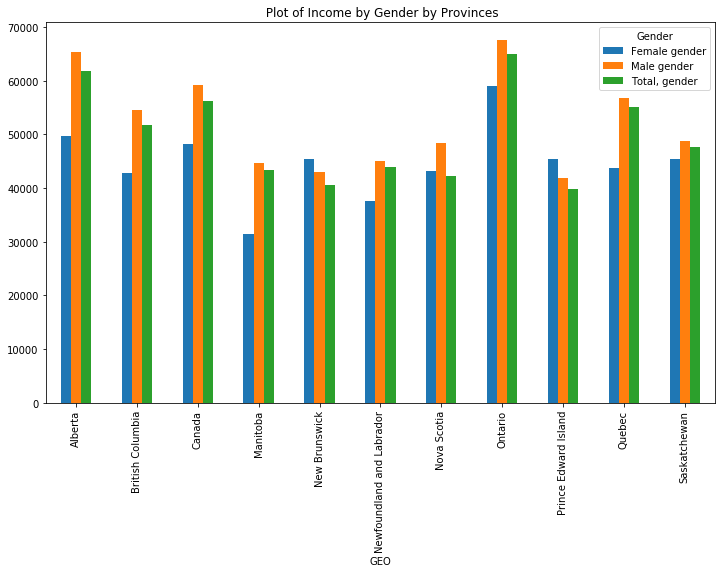

In [0]:

plt.rcParams["figure.figsize"] = (12,7)
p_gender.plot(y = ['Female gender','Male gender','Total, gender'], kind='bar')
plt.title( " Plot of Income by Gender by Provinces")
plt.show()

Looking across all provinces except for two, female income is lower than male income by varying amounts. The two exceptoins are New Brunswick and PEI which have the two lowest total income overall as well. 

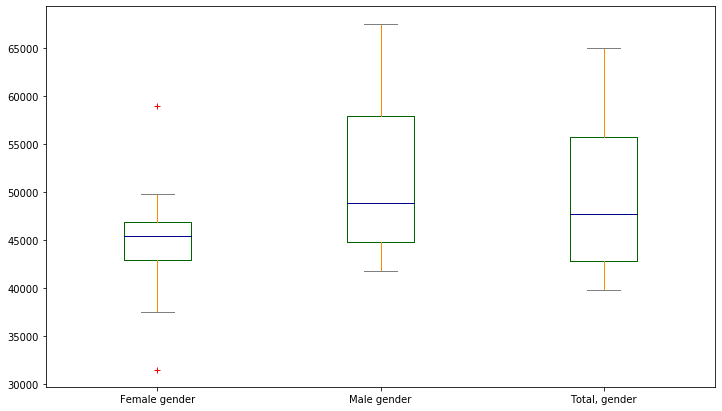

In [0]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}

p_gender.plot.box(color=color, sym='r+')

The male income median and total income median are fairly close, while the median of female income is considerably lower than both of them. However, female income has much lower variance and is also the only plot with outliers, while Male and Total have much longer tails and larger IQR's. 

In [0]:
emp_income_median

,REF_DATE,GEO,Gender,Age_group,VALUE,new_FieldOfStudy
7676,year2010,Canada,"Total, gender",15 to 64 years,41300.0,"Mathematics, computer and information sciences..."
7678,year2010,Canada,"Total, gender",15 to 64 years,42500.0,"Mathematics, computer and information sciences..."
7690,year2010,Canada,"Total, gender",15 to 34 years,40100.0,"Mathematics, computer and information sciences..."
7692,year2010,Canada,"Total, gender",15 to 34 years,40800.0,"Mathematics, computer and information sciences..."
7704,year2010,Canada,"Total, gender",35 to 64 years,42900.0,"Mathematics, computer and information sciences..."
...,...,...,...,...,...,...
2177412,year2015,British Columbia,"Total, gender",15 to 64 years,64800.0,Mathematics and statistics [27]-Master's degree
2177426,year2015,British Columbia,"Total, gender",15 to 34 years,64800.0,Mathematics and statistics [27]-Master's degree
2181273,year2015,British Columbia,"Total, gender",15 to 64 years,81300.0,"Mathematics, computer and information sciences..."
2181275,year2015,British Columbia,"Total, gender",15 to 64 years,81300.0,"Mathematics, computer and information sciences..."


In [0]:
###
index_list = ['GEO','Age_group','Gender','new_FieldOfStudy']
p_median = pd.pivot_table(emp_income_median, values = 'VALUE', index=index_list, columns = 'REF_DATE').reset_index()
#insert missing data
p_median.fillna(np.round(p_median.mean()),inplace=True)
p_median



REF_DATE,GEO,Age_group,Gender,new_FieldOfStudy,year2010,year2011,year2012,year2013,year2014,year2015
0,Alberta,15 to 34 years,Female gender,Computer and information sciences and support ...,53067.0,69800.0,54598.0,52755.0,53132.0,58500.0
1,Alberta,15 to 34 years,Female gender,Mathematics and statistics [27]-Undergraduate ...,53067.0,54261.0,55400.0,49600.0,47400.0,53926.0
2,Alberta,15 to 34 years,Female gender,"Mathematics, computer and information sciences...",41500.0,43200.0,46200.0,41700.0,33600.0,39350.0
3,Alberta,15 to 34 years,Female gender,"Mathematics, computer and information sciences...",63850.0,56500.0,54598.0,61850.0,54450.0,47600.0
4,Alberta,15 to 34 years,Female gender,"Mathematics, computer and information sciences...",54550.0,62350.0,64700.0,50650.0,52650.0,56550.0
...,...,...,...,...,...,...,...,...,...,...
608,Saskatchewan,15 to 64 years,Male gender,"Mathematics, computer and information sciences...",53500.0,59400.0,59900.0,57000.0,61400.0,60450.0
609,Saskatchewan,15 to 64 years,"Total, gender",Computer and information sciences and support ...,39100.0,38350.0,35300.0,37600.0,38000.0,32200.0
610,Saskatchewan,15 to 64 years,"Total, gender",Computer and information sciences and support ...,53300.0,60850.0,60450.0,58700.0,61000.0,60400.0
611,Saskatchewan,15 to 64 years,"Total, gender","Mathematics, computer and information sciences...",39100.0,38350.0,35300.0,37600.0,38000.0,32200.0


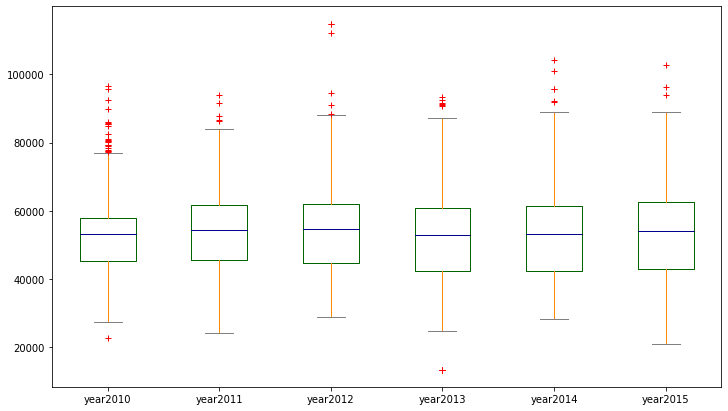

In [0]:
p_median.plot.box(color=color, sym='r+')

Each year has no notable visual effect on combined gender income. all 6 box plots have similiar medians' IQR's, and tails.

# Conclusion

Looking across all provinces except for two, female income is lower than male income by varying amounts. The two exceptoins are New Brunswick and PEI which have the two lowest total income overall as well. Hence gender does affect the median income from 2010 to 2015 in Canada considering the same field of study.